# Delivery to Winter Vashon

Absolutely beautiful day.


In [4]:
# These are libraries written for RaceAnalysis
from global_variables import G
from nbutils import display_markdown, display
import race_logs
import metadata as m
import process as p
import analysis as a
import chart as ch
import utils
import numpy as np

import nbutils

# Initialize for Seattle.
G.init_seattle(logging_level="INFO")

2021-02-21 21:19:00,201|INFO|read_metadata| Read 106 records.
2021-02-21 21:19:00,202|INFO|read_logs| Reading file 2020-12-04_10:03.pd.gz
2021-02-21 21:19:01,484|INFO|read_log_file| Session from 2020-12-04 18:03:43.050000, 245225 rows, 6.811388888888889 hours.
2021-02-21 21:19:02,186|INFO|clean_gps_outliers| Noise in longitude, using median filter.
2021-02-21 21:19:03,405|INFO|read_logs| Found 245223 records before trim.


<IPython.core.display.Javascript object>


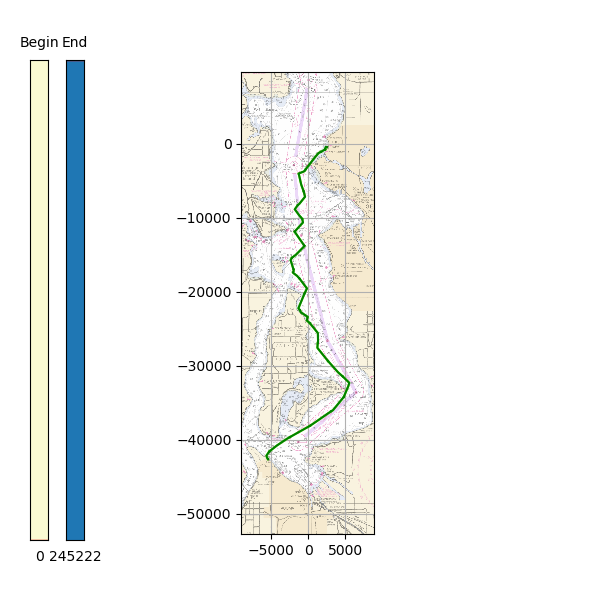

In [3]:
date = '2020-12-04'
df, race = race_logs.read_date(date, race_trim=False)
chart = ch.trim_track(df)

In [5]:
df.iloc[chart.begin]

turn_rate                                        0.247
rtwd                                            39.500
rudder                                          11.800
variation                                       15.100
rhdg                                             8.800
raws                                             0.000
rawa                                            31.400
rsog                                             0.000
latitude                                        47.683
longitude                                     -122.404
row_seconds                                      0.300
rtws                                             0.000
rtwa                                            15.600
zeus_cog                                         0.000
zeus_sog                                         0.050
zeus_altitude                                  -17.800
zeus_gnss_type                                     GPS
altitude                                        -0.730
geoidal_se

In [3]:
if chart.is_trimmed:
    display("Updating Trim!")
    race_logs.trim_race(race, chart.begin, chart.end)

In [6]:
rudder, rrr = p.exponential_filter(np.array(df.rudder), 0.9, 4)
spd, rrr = p.exponential_filter(np.array(df.spd), 0.999, 2)
awa, rrr = p.exponential_filter_angle(np.array(df.awa), 0.999, 10)
df['vmg'] = np.cos(np.radians(df.twa)) * df.spd

<IPython.core.display.Javascript object>


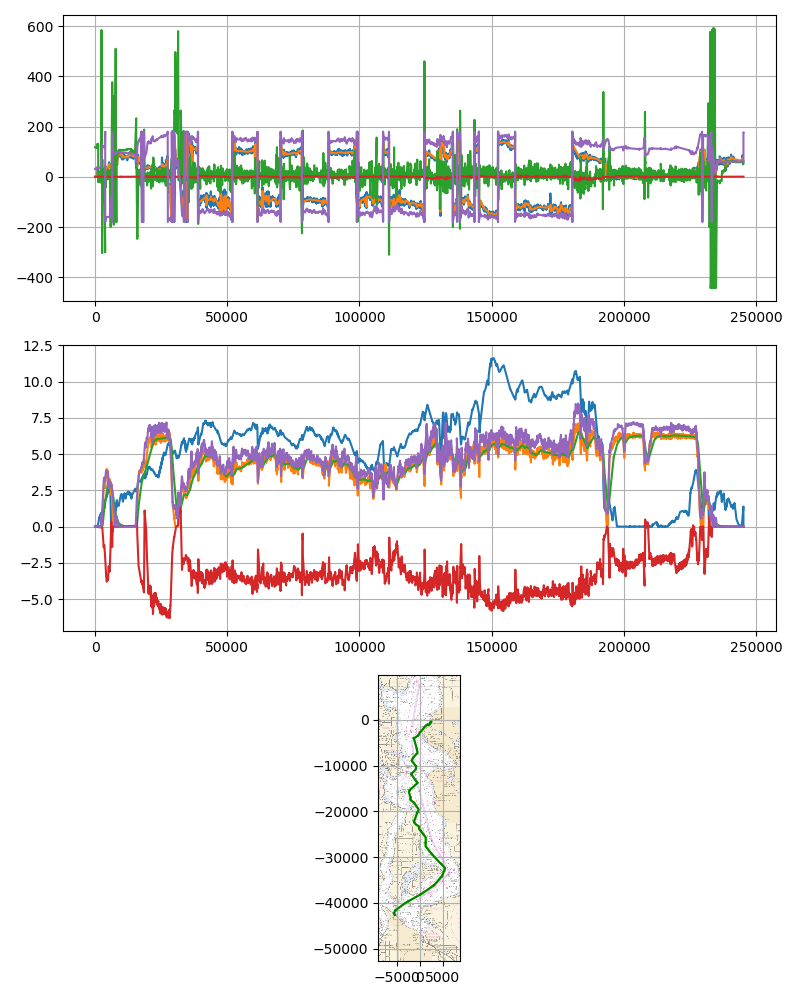

In [7]:
ccc = ch.chart_and_plot(df, None, (df.awa, awa, rudder*10, df.zg100_roll+3.5, df.twa), (df.tws*1.944, df.spd*1.944, spd*1.944, df.vmg*1.944, df.sog*1.944))

In [28]:
sdf = df.iloc[ccc.begin:ccc.end]
sdf.vmg.mean()*1.944, sdf.spd.mean()*1.944

(4.579463657762376, 5.726477197493078)

In [9]:
df.iloc[37510].row_times

Timestamp('2020-12-04 11:06:14.156142756-0800', tz='US/Pacific')